In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [2]:
df_completo = pd.read_csv('datos/csv_df_completo.csv', index_col = 0)
df_completo.sample(3)

,time,age,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
18317,629,40-44,Man,Other,Master’s degree,Data Scientist,20+ years,Python,A laptop,2-5 times,5-10 years,Accounting/Finance,"1000-9,999 employees",1-2,"We recently started using ML methods (i.e., mo...","90,000-99,999",$100-$999,Microsoft SQL Server,Tableau,"Cloud-based data software & APIs (AWS, GCP, Az...","Python, R, MATLAB","RStudio ,PyCharm , Spyder,Jupyter Notebook",None,"Seaborn ,Ggplot / ggplot2 ,Geoplotlib","Scikit-learn ,Xgboost ,LightGBM ,H2O 3","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,"Microsoft SQL Server , Microsoft Azure Cosmos...","Tableau, Alteryx",Kaggle Notebooks,NaN,Azure Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Azure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,Microsoft Azure Data Lake Storage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Databricks,NaN,Alteryx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,N

In [3]:
colum_nuevas = {col :  col.lower().replace(' ', '_') for col in df_completo.columns}
df_completo.rename(columns = colum_nuevas, inplace = True) 

In [4]:
df_completo.sample(3)

,time,age,gender,q3,q4,q5,q6,q8,q11,q13,q15,q20,q21,q22,q23,q25,q26,q33,q35,q41,q7,q9,q12,q14,q16,q17,q24,q32,q34,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q19_part_1,q19_part_2,q19_part_3,q19_part_4,q19_part_5,q19_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q28,q29_a_part_1,q29_a_part_2,q29_a_part_3,q29_a_part_4,q29_a_other,q30_a_part_1,q30_a_part_2,q30_a_part_3,q30_a_part_4,q30_a_part_5,q30_a_part_6,q30_a_part_7,q30_a_other,q31_a_part_1,q31_a_part_2,q31_a_part_3,q31_a_part_4,q31_a_part_5,q31_a_part_6,q31_a_part_7,q31_a_part_8,q31_a_part_9,q31_a_other,q36_a_part_1,q36_a_part_2,q36_a_part_3,q36_a_part_4,q36_a_part_5,q36_a_part_6,q36_a_part_7,q36_a_other,q37_a_part_1,q37_a_part_2,q37_a_part_3,q37_a_part_4,q37_a_part_5,q37_a_part_6,q37_a_part_7,q37_a_other,q38_a_part_1,q38_a_part_2,q38_a_part_3,q38_a_part_4,q38_a_part_5,q38_a_part_6,q38_a_part_7,q38_a_part_8,q38_a_part_9,q38_a_part_10,q38_a_part_11,q38_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other,q27_b_part_1,q27_b_part_2,q27_b_part_3,q27_b_part_4,q27_b_part_5,q27_b_part_6,q27_b_part_7,q27_b_part_8,q27_b_part_9,q27_b_part_10,q27_b_part_11,q27_b_other,q29_b_part_1,q29_b_part_2,q29_b_part_3,q29_b_part_4,q29_b_other,q30_b_part_1,q30_b_part_2,q30_b_part_3,q30_b_part_4,q30_b_part_5,q30_b_part_6,q30_b_part_7,q30_b_other,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q32_b_part_1,q32_b_part_2,q32_b_part_3,q32_b_part_4,q32_b_part_5,q32_b_part_6,q32_b_part_7,q32_b_part_8,q32_b_part_9,q32_b_part_10,q32_b_part_11,q32_b_part_12,q32_b_part_13,q32_b_part_14,q32_b_part_15,q32_b_part_16,q32_b_part_17,q32_b_part_18,q32_b_part_19,q32_b_part_20,q32_b_other,q34_b_part_1,q34_b_part_2,q34_b_part_3,q34_b_part_4,q34_b_part_5,q34_b_part_6,q34_b_part_7,q34_b_part_8,q34_b_part_9,q34_b_part_10,q34_b_part_11,q34_b_part_12,q34_b_part_13,q34_b_part_14,q34_b_part_15,q34_b_part_16,q34_b_other,q36_b_part_1,q36_b_part_2,q36_b_part_3,q36_b_part_4,q36_b_part_5,q36_b_part_6,q36_b_part_7,q36_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q38_b_part_1,q38_b_part_2,q38_b_part_3,q38_b_part_4,q38_b_part_5,q38_b_part_6,q38_b_part_7,q38_b_part_8,q38_b_part_9,q38_b_part_10,q38_b_part_11,q38_b_other
7156,983,18-21,Prefer not to say,China,Some college/university study without earning ...,Student,1-3 years,Python,A laptop,Never,I do not use machine learning methods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alibaba Cloud,Tencent Cloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

['time',
 'age',
 'gender',
 'q3',
 'q4',
 'q5',
 'q6',
 'q8',
 'q11',
 'q13',
 'q15',
 'q20',
 'q21',
 'q22',
 'q23',
 'q25',
 'q26',
 'q33',
 'q35',
 'q41',
 'q7',
 'q9',
 'q12',
 'q14',
 'q16',
 'q17',
 'q24',
 'q32',
 'q34',
 'q10_part_1',
 'q10_part_2',
 'q10_part_3',
 'q10_part_4',
 'q10_part_5',
 'q10_part_6',
 'q10_part_7',
 'q10_part_8',
 'q10_part_9',
 'q10_part_10',
 'q10_part_11',
 'q10_part_12',
 'q10_part_13',
 'q10_part_14',
 'q10_part_15',
 'q10_part_16',
 'q10_other',
 'q18_part_1',
 'q18_part_2',
 'q18_part_3',
 'q18_part_4',
 'q18_part_5',
 'q18_part_6',
 'q18_other',
 'q19_part_1',
 'q19_part_2',
 'q19_part_3',
 'q19_part_4',
 'q19_part_5',
 'q19_other',
 'q27_a_part_1',
 'q27_a_part_2',
 'q27_a_part_3',
 'q27_a_part_4',
 'q27_a_part_5',
 'q27_a_part_6',
 'q27_a_part_7',
 'q27_a_part_8',
 'q27_a_part_9',
 'q27_a_part_10',
 'q27_a_part_11',
 'q27_a_other',
 'q28',
 'q29_a_part_1',
 'q29_a_part_2',
 'q29_a_part_3',
 'q29_a_part_4',
 'q29_a_other',
 'q30_a_part_1',
 'q

In [6]:
df_da = df_completo[df_completo["q5"] == "Data Analyst"]
df_da.head()

,time,age,gender,q3,q4,q5,q6,q8,q11,q13,q15,q20,q21,q22,q23,q25,q26,q33,q35,q41,q7,q9,q12,q14,q16,q17,q24,q32,q34,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q19_part_1,q19_part_2,q19_part_3,q19_part_4,q19_part_5,q19_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q28,q29_a_part_1,q29_a_part_2,q29_a_part_3,q29_a_part_4,q29_a_other,q30_a_part_1,q30_a_part_2,q30_a_part_3,q30_a_part_4,q30_a_part_5,q30_a_part_6,q30_a_part_7,q30_a_other,q31_a_part_1,q31_a_part_2,q31_a_part_3,q31_a_part_4,q31_a_part_5,q31_a_part_6,q31_a_part_7,q31_a_part_8,q31_a_part_9,q31_a_other,q36_a_part_1,q36_a_part_2,q36_a_part_3,q36_a_part_4,q36_a_part_5,q36_a_part_6,q36_a_part_7,q36_a_other,q37_a_part_1,q37_a_part_2,q37_a_part_3,q37_a_part_4,q37_a_part_5,q37_a_part_6,q37_a_part_7,q37_a_other,q38_a_part_1,q38_a_part_2,q38_a_part_3,q38_a_part_4,q38_a_part_5,q38_a_part_6,q38_a_part_7,q38_a_part_8,q38_a_part_9,q38_a_part_10,q38_a_part_11,q38_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other,q27_b_part_1,q27_b_part_2,q27_b_part_3,q27_b_part_4,q27_b_part_5,q27_b_part_6,q27_b_part_7,q27_b_part_8,q27_b_part_9,q27_b_part_10,q27_b_part_11,q27_b_other,q29_b_part_1,q29_b_part_2,q29_b_part_3,q29_b_part_4,q29_b_other,q30_b_part_1,q30_b_part_2,q30_b_part_3,q30_b_part_4,q30_b_part_5,q30_b_part_6,q30_b_part_7,q30_b_other,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q32_b_part_1,q32_b_part_2,q32_b_part_3,q32_b_part_4,q32_b_part_5,q32_b_part_6,q32_b_part_7,q32_b_part_8,q32_b_part_9,q32_b_part_10,q32_b_part_11,q32_b_part_12,q32_b_part_13,q32_b_part_14,q32_b_part_15,q32_b_part_16,q32_b_part_17,q32_b_part_18,q32_b_part_19,q32_b_part_20,q32_b_other,q34_b_part_1,q34_b_part_2,q34_b_part_3,q34_b_part_4,q34_b_part_5,q34_b_part_6,q34_b_part_7,q34_b_part_8,q34_b_part_9,q34_b_part_10,q34_b_part_11,q34_b_part_12,q34_b_part_13,q34_b_part_14,q34_b_part_15,q34_b_part_16,q34_b_other,q36_b_part_1,q36_b_part_2,q36_b_part_3,q36_b_part_4,q36_b_part_5,q36_b_part_6,q36_b_part_7,q36_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q38_b_part_1,q38_b_part_2,q38_b_part_3,q38_b_part_4,q38_b_part_5,q38_b_part_6,q38_b_part_7,q38_b_part_8,q38_b_part_9,q38_b_part_10,q38_b_part_11,q38_b_other
16,1315,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,Python,A laptop,Never,1-2 years,Energy/Mining,"1000-9,999 employees",5-9,We are exploring ML methods (and may one day p...,"2,000-2,999",$0 ($USD),NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",None,"Matplotlib ,Seaborn ,Plotly / Plotly Express",Scikit-learn,Linear or Logistic Regression,Analyze and understand data to influence produ...,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Databricks Collaborative Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certi

In [7]:
df_q8 = df_da['q8'].value_counts().reset_index()
df_q8

,index,q8
0,Python,1587
1,SQL,261
2,R,199
3,C++,22
4,Java,18
5,Other,16
6,C,12
7,MATLAB,11
8,None,10
9,Javascript,9


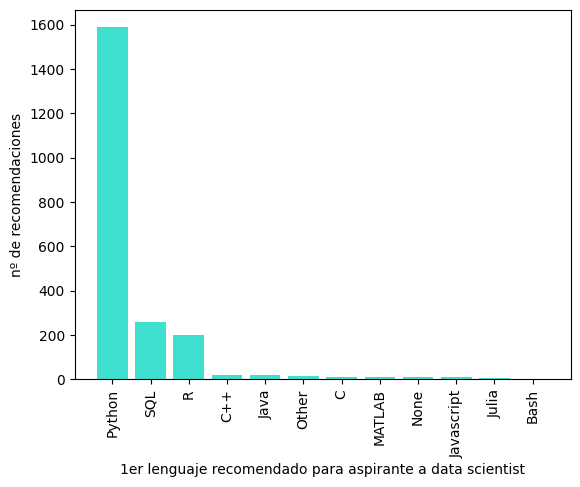

In [8]:
plt.figure()
plt.bar(df_q8['index'], df_q8['q8'], color='turquoise')
plt.xlabel('1er lenguaje recomendado para aspirante a data scientist')
plt.ylabel('nº de recomendaciones') 
plt.xticks(rotation = 'vertical')
plt.show()

In [9]:
# filtramos por país
df_da_esp = df_da[df_da['q3'] == 'Spain']
df_da_esp.sample(1)

,time,age,gender,q3,q4,q5,q6,q8,q11,q13,q15,q20,q21,q22,q23,q25,q26,q33,q35,q41,q7,q9,q12,q14,q16,q17,q24,q32,q34,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q19_part_1,q19_part_2,q19_part_3,q19_part_4,q19_part_5,q19_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q28,q29_a_part_1,q29_a_part_2,q29_a_part_3,q29_a_part_4,q29_a_other,q30_a_part_1,q30_a_part_2,q30_a_part_3,q30_a_part_4,q30_a_part_5,q30_a_part_6,q30_a_part_7,q30_a_other,q31_a_part_1,q31_a_part_2,q31_a_part_3,q31_a_part_4,q31_a_part_5,q31_a_part_6,q31_a_part_7,q31_a_part_8,q31_a_part_9,q31_a_other,q36_a_part_1,q36_a_part_2,q36_a_part_3,q36_a_part_4,q36_a_part_5,q36_a_part_6,q36_a_part_7,q36_a_other,q37_a_part_1,q37_a_part_2,q37_a_part_3,q37_a_part_4,q37_a_part_5,q37_a_part_6,q37_a_part_7,q37_a_other,q38_a_part_1,q38_a_part_2,q38_a_part_3,q38_a_part_4,q38_a_part_5,q38_a_part_6,q38_a_part_7,q38_a_part_8,q38_a_part_9,q38_a_part_10,q38_a_part_11,q38_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other,q27_b_part_1,q27_b_part_2,q27_b_part_3,q27_b_part_4,q27_b_part_5,q27_b_part_6,q27_b_part_7,q27_b_part_8,q27_b_part_9,q27_b_part_10,q27_b_part_11,q27_b_other,q29_b_part_1,q29_b_part_2,q29_b_part_3,q29_b_part_4,q29_b_other,q30_b_part_1,q30_b_part_2,q30_b_part_3,q30_b_part_4,q30_b_part_5,q30_b_part_6,q30_b_part_7,q30_b_other,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q32_b_part_1,q32_b_part_2,q32_b_part_3,q32_b_part_4,q32_b_part_5,q32_b_part_6,q32_b_part_7,q32_b_part_8,q32_b_part_9,q32_b_part_10,q32_b_part_11,q32_b_part_12,q32_b_part_13,q32_b_part_14,q32_b_part_15,q32_b_part_16,q32_b_part_17,q32_b_part_18,q32_b_part_19,q32_b_part_20,q32_b_other,q34_b_part_1,q34_b_part_2,q34_b_part_3,q34_b_part_4,q34_b_part_5,q34_b_part_6,q34_b_part_7,q34_b_part_8,q34_b_part_9,q34_b_part_10,q34_b_part_11,q34_b_part_12,q34_b_part_13,q34_b_part_14,q34_b_part_15,q34_b_part_16,q34_b_other,q36_b_part_1,q36_b_part_2,q36_b_part_3,q36_b_part_4,q36_b_part_5,q36_b_part_6,q36_b_part_7,q36_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q38_b_part_1,q38_b_part_2,q38_b_part_3,q38_b_part_4,q38_b_part_5,q38_b_part_6,q38_b_part_7,q38_b_part_8,q38_b_part_9,q38_b_part_10,q38_b_part_11,q38_b_other
15702,28310,55-59,Man,Spain,Doctoral degree,Data Analyst,20+ years,Julia,"A cloud computing platform (AWS, Azure, GCP, h...",Once,20 or more years,Academics/Education,"1000-9,999 employees",5-9,We are exploring ML methods (and may one day p...,"50,000-59,999","$10,000-$99,999",NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, Julia","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Other,Matplotlib,"Scikit-learn ,Keras ,PyTorch","Linear or Logistic Regression, Decision Trees ...",Build and/or run a machine learning service t...,MySQL,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Image segmentation methods (U-Net, Mask R-CNN,...",NaN,Image classification and other general purpose...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VMware Cloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [10]:
df_da['q3'].unique()

array(['Belgium', 'United States of America', 'Egypt', 'China',
       'South Africa', 'India', 'Israel', 'Colombia', 'Brazil', 'Ukraine',
       'Pakistan', 'Other', 'Canada', 'Nigeria', 'Tunisia', 'Italy',
       'Spain', 'Indonesia', 'Sri Lanka',
       'United Kingdom of Great Britain and Northern Ireland', 'Turkey',
       'Kenya', 'Iran, Islamic Republic of...', 'South Korea', 'Russia',
       'Peru', 'Germany', 'France', 'Greece', 'Taiwan', 'Portugal',
       'Australia', 'Philippines', 'Singapore', 'Netherlands', 'Japan',
       'Mexico', 'Saudi Arabia', 'Argentina', 'Ghana', 'Morocco',
       'Poland', 'Thailand', 'Switzerland', 'Hong Kong (S.A.R.)',
       'Ecuador', 'Bangladesh', 'Malaysia', 'Romania', 'Viet Nam',
       'United Arab Emirates', 'Ethiopia', 'Czech Republic',
       'I do not wish to disclose my location', 'Sweden', 'Iraq',
       'Ireland', 'Denmark', 'Uganda', 'Belarus', 'Nepal', 'Austria',
       'Chile', 'Kazakhstan', 'Norway'], dtype=object)

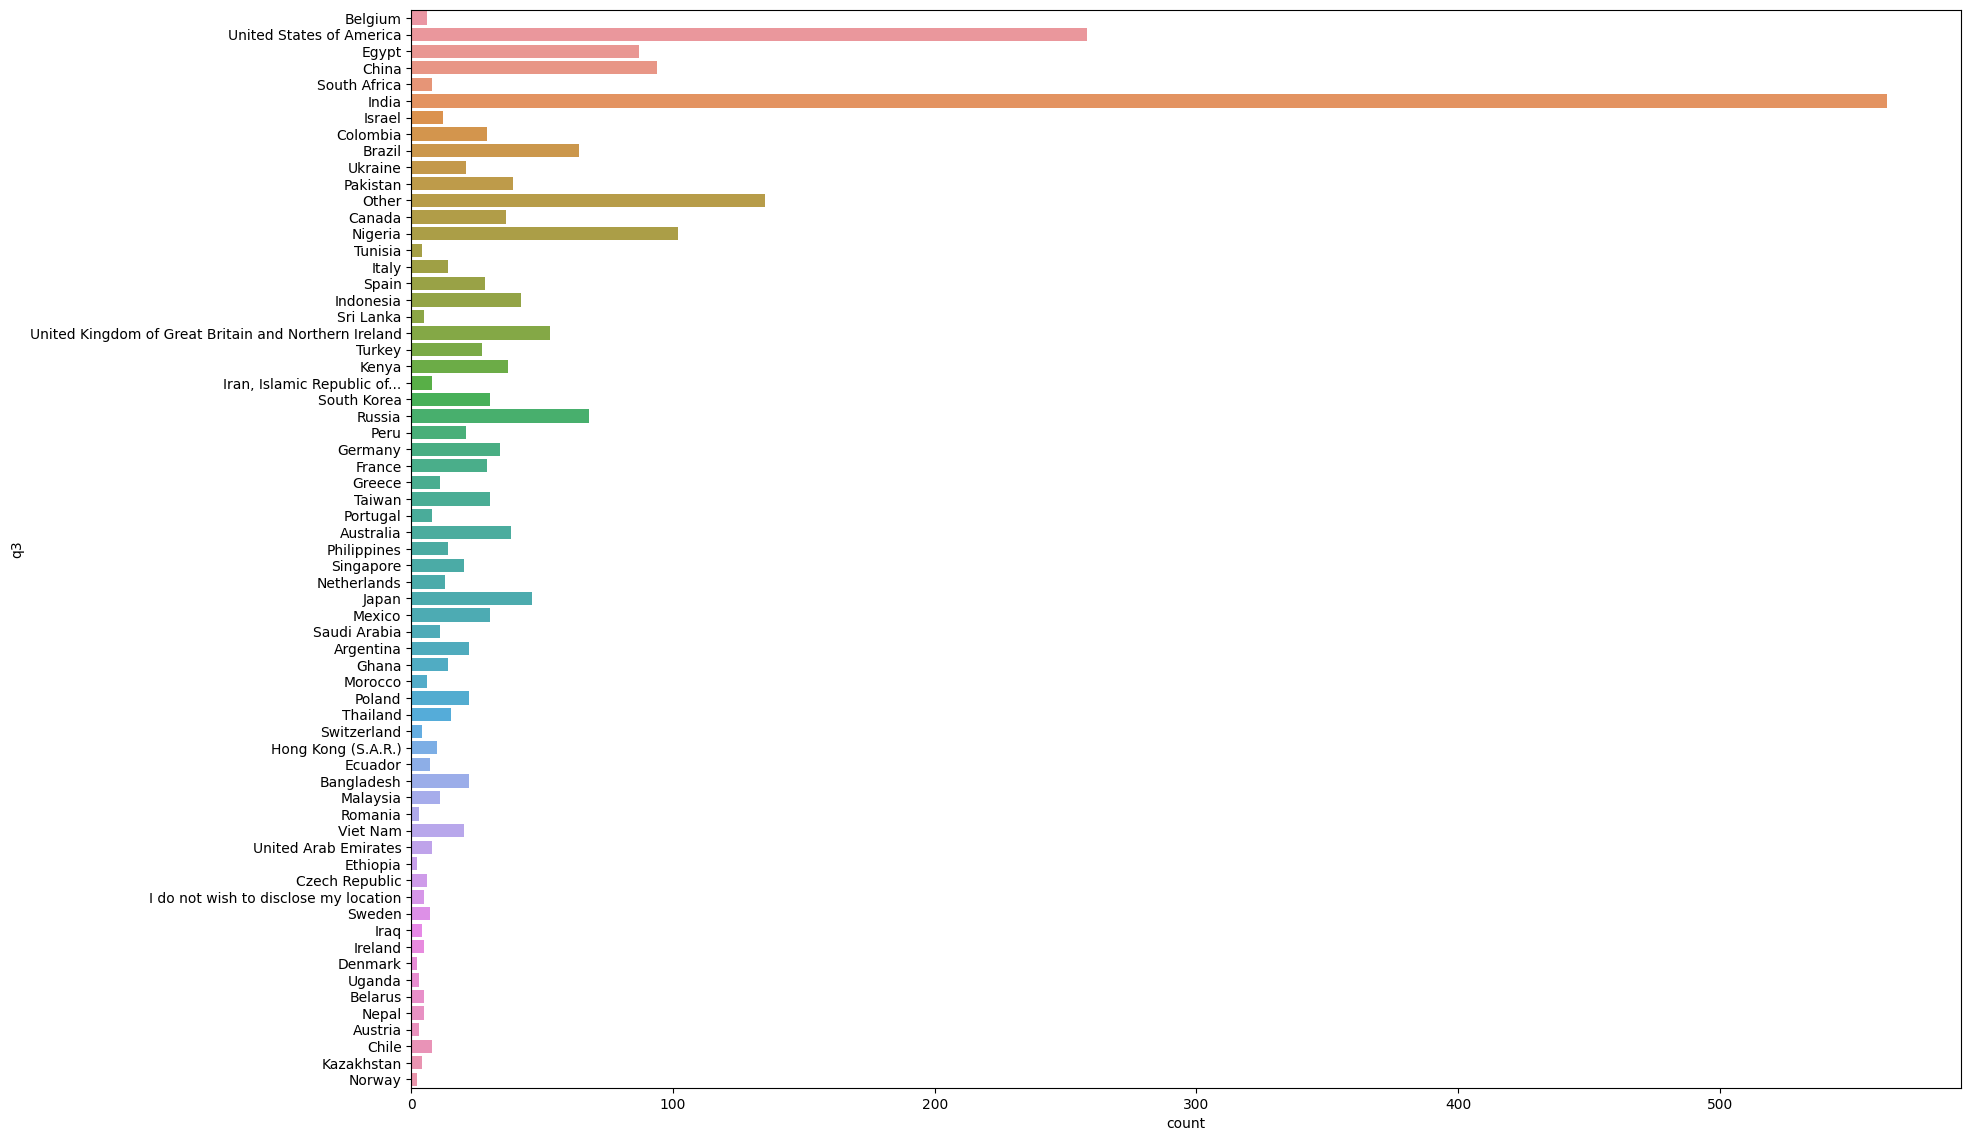

In [11]:
# sacamos la encuesta por países
plt.figure(figsize=(20,14))

fig = sns.countplot(y = 'q3', data = df_da)

plt.show()

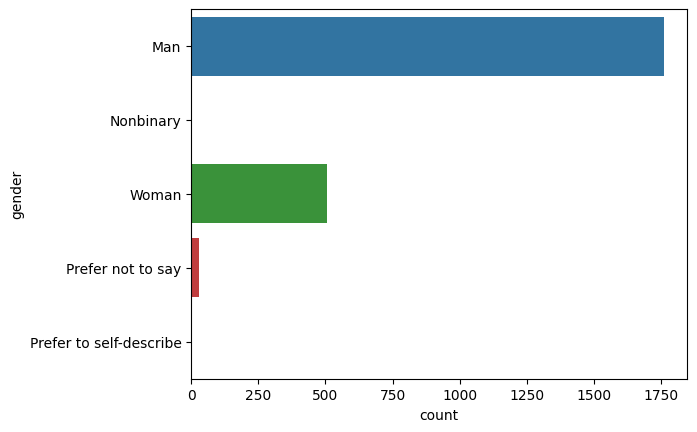

In [12]:
plt.figure()

fig = sns.countplot(y = 'gender', data = df_da)

plt.show()

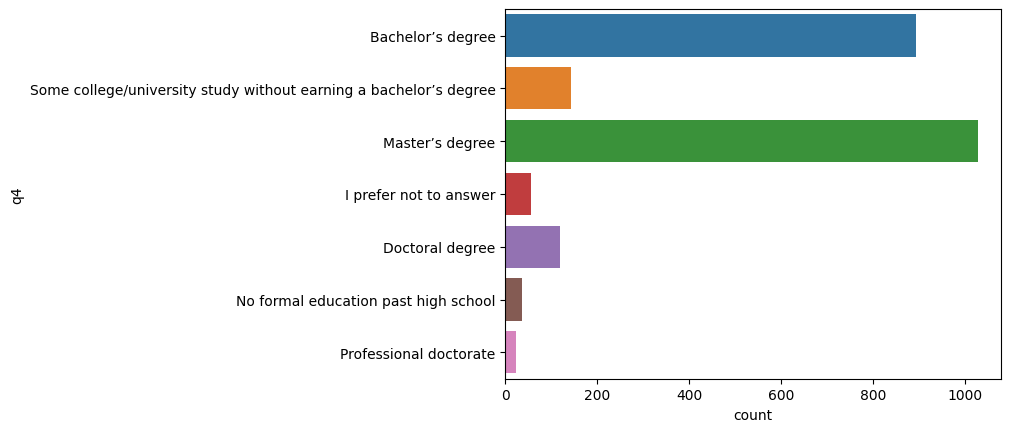

In [13]:
plt.figure()

fig = sns.countplot(y = 'q4', data = df_da)

plt.show()

In [14]:
df_da['q7'].value_counts()

Python, SQL                                466
Python                                     315
Python, R, SQL                             259
Python, R                                   97
 SQL                                        78
                                          ... 
Python, R, Javascript, MATLAB                1
Python, R, SQL, Julia                        1
Python, R, Javascript, Bash                  1
Python, C, C++, Java, Other                  1
Python, R, SQL, Java, Javascript, Other      1
Name: q7, Length: 213, dtype: int64

In [15]:
df_da.sample(3)

,time,age,gender,q3,q4,q5,q6,q8,q11,q13,q15,q20,q21,q22,q23,q25,q26,q33,q35,q41,q7,q9,q12,q14,q16,q17,q24,q32,q34,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q19_part_1,q19_part_2,q19_part_3,q19_part_4,q19_part_5,q19_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q28,q29_a_part_1,q29_a_part_2,q29_a_part_3,q29_a_part_4,q29_a_other,q30_a_part_1,q30_a_part_2,q30_a_part_3,q30_a_part_4,q30_a_part_5,q30_a_part_6,q30_a_part_7,q30_a_other,q31_a_part_1,q31_a_part_2,q31_a_part_3,q31_a_part_4,q31_a_part_5,q31_a_part_6,q31_a_part_7,q31_a_part_8,q31_a_part_9,q31_a_other,q36_a_part_1,q36_a_part_2,q36_a_part_3,q36_a_part_4,q36_a_part_5,q36_a_part_6,q36_a_part_7,q36_a_other,q37_a_part_1,q37_a_part_2,q37_a_part_3,q37_a_part_4,q37_a_part_5,q37_a_part_6,q37_a_part_7,q37_a_other,q38_a_part_1,q38_a_part_2,q38_a_part_3,q38_a_part_4,q38_a_part_5,q38_a_part_6,q38_a_part_7,q38_a_part_8,q38_a_part_9,q38_a_part_10,q38_a_part_11,q38_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other,q27_b_part_1,q27_b_part_2,q27_b_part_3,q27_b_part_4,q27_b_part_5,q27_b_part_6,q27_b_part_7,q27_b_part_8,q27_b_part_9,q27_b_part_10,q27_b_part_11,q27_b_other,q29_b_part_1,q29_b_part_2,q29_b_part_3,q29_b_part_4,q29_b_other,q30_b_part_1,q30_b_part_2,q30_b_part_3,q30_b_part_4,q30_b_part_5,q30_b_part_6,q30_b_part_7,q30_b_other,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q32_b_part_1,q32_b_part_2,q32_b_part_3,q32_b_part_4,q32_b_part_5,q32_b_part_6,q32_b_part_7,q32_b_part_8,q32_b_part_9,q32_b_part_10,q32_b_part_11,q32_b_part_12,q32_b_part_13,q32_b_part_14,q32_b_part_15,q32_b_part_16,q32_b_part_17,q32_b_part_18,q32_b_part_19,q32_b_part_20,q32_b_other,q34_b_part_1,q34_b_part_2,q34_b_part_3,q34_b_part_4,q34_b_part_5,q34_b_part_6,q34_b_part_7,q34_b_part_8,q34_b_part_9,q34_b_part_10,q34_b_part_11,q34_b_part_12,q34_b_part_13,q34_b_part_14,q34_b_part_15,q34_b_part_16,q34_b_other,q36_b_part_1,q36_b_part_2,q36_b_part_3,q36_b_part_4,q36_b_part_5,q36_b_part_6,q36_b_part_7,q36_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q38_b_part_1,q38_b_part_2,q38_b_part_3,q38_b_part_4,q38_b_part_5,q38_b_part_6,q38_b_part_7,q38_b_part_8,q38_b_part_9,q38_b_part_10,q38_b_part_11,q38_b_other
10949,969,35-39,Woman,India,Master’s degree,Data Analyst,10-20 years,Python,A laptop,Never,5-10 years,Computers/Technology,0-49 employees,10-14,"We have well established ML methods (i.e., mod...","1,000-1,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc)",Google Cloud TPUs,"Matplotlib ,Seaborn","Scikit-learn ,Xgboost","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,MySQL,None,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Image classification and other general purpose...,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN,Amazon Web Services (AWS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

<Axes: xlabel='count', ylabel='q6'>

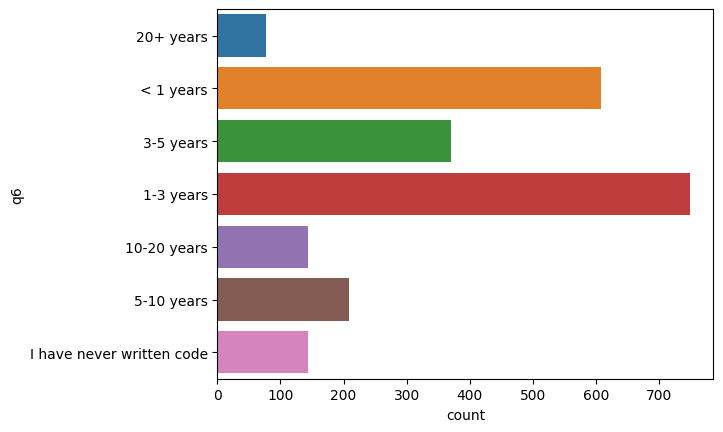

In [16]:
sns.countplot(y ='q6', data = df_da)

In [17]:
df_da['q4'].unique()

array(['Bachelor’s degree',
       'Some college/university study without earning a bachelor’s degree',
       'Master’s degree', 'I prefer not to answer', 'Doctoral degree',
       'No formal education past high school', 'Professional doctorate'],
      dtype=object)

In [18]:
df_da.describe(include = 'object')

,age,gender,q3,q4,q5,q6,q8,q11,q13,q15,q20,q21,q22,q23,q25,q26,q33,q35,q41,q7,q9,q12,q14,q16,q17,q24,q32,q34,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q19_part_1,q19_part_2,q19_part_3,q19_part_4,q19_part_5,q19_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q28,q29_a_part_1,q29_a_part_2,q29_a_part_3,q29_a_part_4,q29_a_other,q30_a_part_1,q30_a_part_2,q30_a_part_3,q30_a_part_4,q30_a_part_5,q30_a_part_6,q30_a_part_7,q30_a_other,q31_a_part_1,q31_a_part_2,q31_a_part_3,q31_a_part_4,q31_a_part_5,q31_a_part_6,q31_a_part_7,q31_a_part_8,q31_a_part_9,q31_a_other,q36_a_part_1,q36_a_part_2,q36_a_part_3,q36_a_part_4,q36_a_part_5,q36_a_part_6,q36_a_part_7,q36_a_other,q37_a_part_1,q37_a_part_2,q37_a_part_3,q37_a_part_4,q37_a_part_5,q37_a_part_6,q37_a_part_7,q37_a_other,q38_a_part_1,q38_a_part_2,q38_a_part_3,q38_a_part_4,q38_a_part_5,q38_a_part_6,q38_a_part_7,q38_a_part_8,q38_a_part_9,q38_a_part_10,q38_a_part_11,q38_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other,q27_b_part_1,q27_b_part_2,q27_b_part_3,q27_b_part_4,q27_b_part_5,q27_b_part_6,q27_b_part_7,q27_b_part_8,q27_b_part_9,q27_b_part_10,q27_b_part_11,q27_b_other,q29_b_part_1,q29_b_part_2,q29_b_part_3,q29_b_part_4,q29_b_other,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q32_b_part_1,q32_b_part_2,q32_b_part_3,q32_b_part_4,q32_b_part_5,q32_b_part_6,q32_b_part_7,q32_b_part_8,q32_b_part_9,q32_b_part_10,q32_b_part_11,q32_b_part_12,q32_b_part_13,q32_b_part_14,q32_b_part_15,q32_b_part_16,q32_b_part_17,q32_b_part_18,q32_b_part_19,q32_b_part_20,q32_b_other,q34_b_part_1,q34_b_part_2,q34_b_part_3,q34_b_part_4,q34_b_part_5,q34_b_part_6,q34_b_part_7,q34_b_part_8,q34_b_part_9,q34_b_part_10,q34_b_part_11,q34_b_part_12,q34_b_part_13,q34_b_part_14,q34_b_part_15,q34_b_part_16,q34_b_other,q36_b_part_1,q36_b_part_2,q36_b_part_3,q36_b_part_4,q36_b_part_5,q36_b_part_6,q36_b_part_7,q36_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q38_b_part_1,q38_b_part_2,q38_b_part_3,q38_b_part_4,q38_b_part_5,q38_b_part_6,q38_b_part_7,q38_b_part_8,q38_b_part_9,q38_b_part_10,q38_b_part_11,q38_b_other
count,2301,2301,2301,2301,2301,2301,2157,2148,2134,2094,2187,2171,2151,2114,2039,2009,607,443,1768,2158,2155,2140,2108,1648,1636,2074,1239,1232,793,662,110,14,177,15,97,51,34,169,187,70,20,21,25,658,95,103,120,99,172,75,111,10,127,102,36,109,92,7,384,295,364,80,72,55,48,60,44,34,406,40,364,192,168,193,290,18,108,101,185,64,220,97,227,14,79,126,87,52,104,33,55,48,835,36,103,78,148,35,58,84,896,32,85,33,36,40,42,53,110,27,23,40,8,14,118,13,15,20,14,85,950,28,35,49,23,562,93,438,197,50,417,48,892,308,818,543,60,269,714,367,149,371,139,226,309,303,271,1049,267,969,180,684,184,191,120,57,465,383,448,136,136,86,44,72,38,30,137,27,337,394,450,81,6,226,378,322,122,176,58,104,85,240,28,430,277,193,173,272,118,87,285,231,124,108,74,80,150,216,245,93,160,90,78,22,468,75,280,63,500,104,161,99,19,23,73,21,108,116,19,101,18,210,219,316,114,182,273,266,26,317,84,130,113,173,238,80,20,80,87,53,39,236,50,66,72,53,186,386,31
unique,11,5,65,7,1,7,12,6,5,9,18,5,7,6,26,6,20,14,6,213,408,20,191,298,221,70,326,133,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,13,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1

In [19]:
df_da['age'].value_counts()

25-29    588
30-34    420
22-24    419
35-39    280
18-21    191
40-44    163
45-49    105
50-54     67
55-59     32
60-69     28
70+        8
Name: age, dtype: int64

In [20]:
import re

In [34]:
col_todas = list(df_completo.columns)
print(col_todas)

['time', 'age', 'gender', 'q3', 'q4', 'q5', 'q6', 'q8', 'q11', 'q13', 'q15', 'q20', 'q21', 'q22', 'q23', 'q25', 'q26', 'q33', 'q35', 'q41', 'q7', 'q9', 'q12', 'q14', 'q16', 'q17', 'q24', 'q32', 'q34', 'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5', 'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10', 'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14', 'q10_part_15', 'q10_part_16', 'q10_other', 'q18_part_1', 'q18_part_2', 'q18_part_3', 'q18_part_4', 'q18_part_5', 'q18_part_6', 'q18_other', 'q19_part_1', 'q19_part_2', 'q19_part_3', 'q19_part_4', 'q19_part_5', 'q19_other', 'q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4', 'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8', 'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other', 'q28', 'q29_a_part_1', 'q29_a_part_2', 'q29_a_part_3', 'q29_a_part_4', 'q29_a_other', 'q30_a_part_1', 'q30_a_part_2', 'q30_a_part_3', 'q30_a_part_4', 'q30_a_part_5', 'q30_a_part_6', 

In [39]:
# creamos el df con las columnas que queremos usar
df_resumido = df_da[['age','gender', 'q3', 'q4', 'q6', 'q7', 'q8', 'q9', 'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5', 'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10', 'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14', 'q10_part_15', 'q10_part_16', 'q10_other', 'q14', 'q34', 'q35', 'q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4', 'q39_part_5', 'q39_part_6', 'q39_part_7', 'q39_part_8', 'q39_part_9', 'q39_other', 'q41']]
df_resumido.sample(5)

,age,gender,q3,q4,q6,q7,q8,q9,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q14,q34,q35,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q41
14702,45-49,Woman,United States of America,Master’s degree,I have never written code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23341,30-34,Man,Singapore,Master’s degree,3-5 years,"Python, R, SQL",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Matplotlib ,Seaborn ,Plotly / Plotly Express",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17444,22-24,Man,Russia,Master’s degree,1-3 years,"Python, R, SQL",Python,"RStudio ,Jupyter Notebook",Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Matplotlib ,Seaborn ,Ggplot / ggplot2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."
7893,25-29,Man,Other,Master’s degree,1-3 years,SQL,Python,"RStudio , Notepad++,Jupyter Notebook",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Matplotlib,"Microsoft Power BI, Looker, Tableau",Tableau,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,"Business intelligence software (Salesforce, Ta..."
20736,30-34,Man,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,10-20 years,"Python, R, SQL",Python,"RStudio ,Jupyter Notebook, Other",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,"Matplotlib ,Seaborn ,Ggplot / ggplot2",None,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."


In [40]:
# creamos un df con la pregunta q10
df_q10 = df_resumido[['q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5', 'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10', 'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14', 'q10_part_15', 'q10_part_16', 'q10_other']]
df_q10.sample()

,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other
4210,NaN,NaN,NaN,NaN,Binder / JupyterHub,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# intentamos poner en el nombre de las columnas el valor de la respuesta =! de 'Nan'
df_q10['q10_part_1'].value_counts()

 Kaggle Notebooks    793
Name: q10_part_1, dtype: int64

In [45]:
df_q10['q10_part_1'].unique()

array([' Kaggle Notebooks', nan], dtype=object)

In [47]:
df_q10['q10_part_2'].unique()

array(['Colab Notebooks', nan], dtype=object)

In [53]:
df_q10.describe(include='object')

,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other
count,793,662,110,14,177,15,97,51,34,169,187,70,20,21,25,658,95
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,Kaggle Notebooks,Colab Notebooks,Azure Notebooks,Paperspace / Gradient,Binder / JupyterHub,Code Ocean,IBM Watson Studio,Amazon Sagemaker Studio Notebooks,Amazon EMR Notebooks,Google Cloud Notebooks (AI Platform / Vertex AI),Google Cloud Datalab,Databricks Collaborative Notebooks,Zeppelin / Zepl Notebooks,Deepnote Notebooks,Observable Notebooks,None,Other
freq,793,662,110,14,177,15,97,51,34,169,187,70,20,21,25,658,95


In [62]:
df_q10.columns

Index(['q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other'],
      dtype='object')

In [63]:
df_q10['q10_part_1'].unique()

array([' Kaggle Notebooks', nan], dtype=object)

In [98]:
nomb_col_q10 = []
for col in df_q10.columns:
    try: 
        print(f'primer nivel: {df_q10[col].unique()}')
        for i in df_q10[col].unique():
            print(f'segundo nivel: {df_q10[col].unique()}')
            print(i)
            i = str(i)
            print(f'despues del cambio:{i}')
            print(type(i))
            if i != 'nan':
                print(f'TERCER nivel: {i}')
                i = i.strip().replace(' ', '_')
                print(f'i LISTO PARA AÑADIR: \n{i}')
                nomb_col_q10 = nomb_col_q10.append(i)
                #df_q10[col].unique()[i].strip().replace(' ', '_')
            else:
                print(i)
                pass
    except:
        #df_q10[col].unique()[i].strip().replace(' ', '_')
        print('estoy en el except con la columna {col} , elemento {i}')
print(f'LISTA NOMBRES COLUMNAS: {nomb_col_q10}')

primer nivel: [' Kaggle Notebooks' nan]
segundo nivel: [' Kaggle Notebooks' nan]
 Kaggle Notebooks
despues del cambio: Kaggle Notebooks
<class 'str'>
TERCER nivel:  Kaggle Notebooks
i LISTO PARA AÑADIR: 
Kaggle_Notebooks
segundo nivel: [' Kaggle Notebooks' nan]
nan
despues del cambio:nan
<class 'str'>
nan
primer nivel: ['Colab Notebooks' nan]
segundo nivel: ['Colab Notebooks' nan]
Colab Notebooks
despues del cambio:Colab Notebooks
<class 'str'>
TERCER nivel: Colab Notebooks
i LISTO PARA AÑADIR: 
Colab_Notebooks
estoy en el except con la columna {col} , elemento {i}
primer nivel: [nan 'Azure Notebooks']
segundo nivel: [nan 'Azure Notebooks']
nan
despues del cambio:nan
<class 'str'>
nan
segundo nivel: [nan 'Azure Notebooks']
Azure Notebooks
despues del cambio:Azure Notebooks
<class 'str'>
TERCER nivel: Azure Notebooks
i LISTO PARA AÑADIR: 
Azure_Notebooks
estoy en el except con la columna {col} , elemento {i}
primer nivel: [nan ' Paperspace / Gradient ']
segundo nivel: [nan ' Paperspace 

In [49]:
colum_q10 = {col :  df_q10[col].unique()[0].strip().replace(' ', '_') for col in df_q10.columns}
df_q10.rename(columns = colum_q10, inplace = True)
df_q10.sample()


AttributeError: 'float' object has no attribute 'strip'

In [41]:
sns.countplot(df_q10)

ValueError: min() arg is an empty sequence